[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


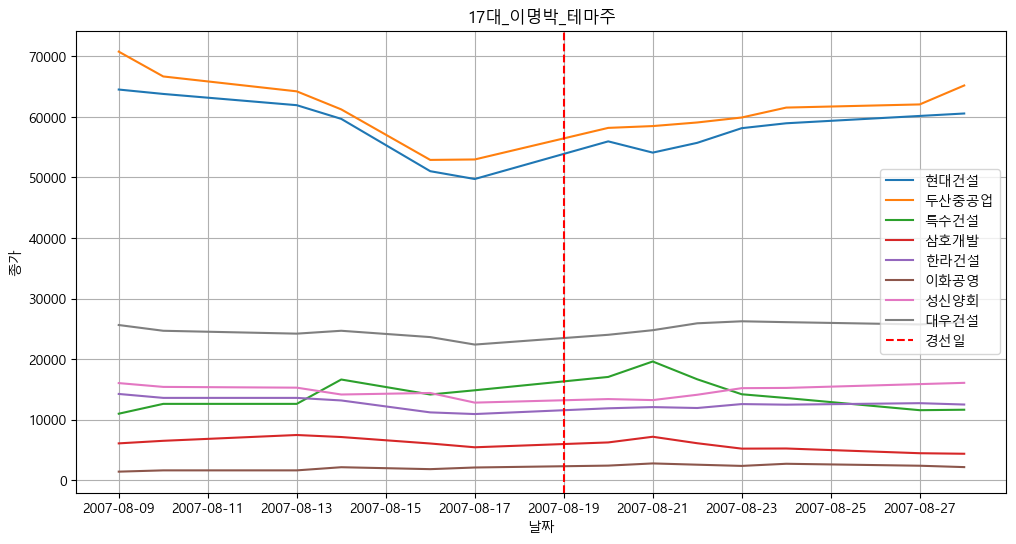

In [6]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import yfinance as yf
import matplotlib as mpl
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2007-08-09' #경선확정일 - 10
end_date = '2007-08-29' #경선확정일 + 10

thema1 = yf.download('000720.KS', start=start_date, end=end_date) #테마주1
thema3 = yf.download('034020.KS', start=start_date, end=end_date)
thema4 = yf.download('026150.KS', start=start_date, end=end_date)
thema5 = yf.download('010960.KS', start=start_date, end=end_date)
thema6 = yf.download('014790.KS', start=start_date, end=end_date)
thema7 = yf.download('001840.KS', start=start_date, end=end_date)
thema8 = yf.download('004980.KS', start=start_date, end=end_date)
thema9 = yf.download('047040.KS', start=start_date, end=end_date)#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='현대건설')
plt.plot(thema.index, thema['thema3'], label='두산중공업')
plt.plot(thema.index, thema['thema4'], label='특수건설')
plt.plot(thema.index, thema['thema5'], label='삼호개발')
plt.plot(thema.index, thema['thema6'], label='한라건설')
plt.plot(thema.index, thema['thema7'], label='이화공영')
plt.plot(thema.index, thema['thema8'], label='성신양회')
plt.plot(thema.index, thema['thema9'], label='대우건설')
#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2007-08-19'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('17대_이명박_테마주')
plt.legend()
plt.grid(True)
plt.show()

label_dict = {
    'thema1': '현대건설',
    'thema3': '두산중공업',
    'thema4': '특수건설',
    'thema5': '삼호개발',
    'thema6': '한라건설',
    'thema7': '이화공영',
    'thema8': '성신양회',
    'thema9': '대우건설',
    
}

# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('17대_이명박_테마주_일별종가_단기.csv', encoding='utf-8-sig')


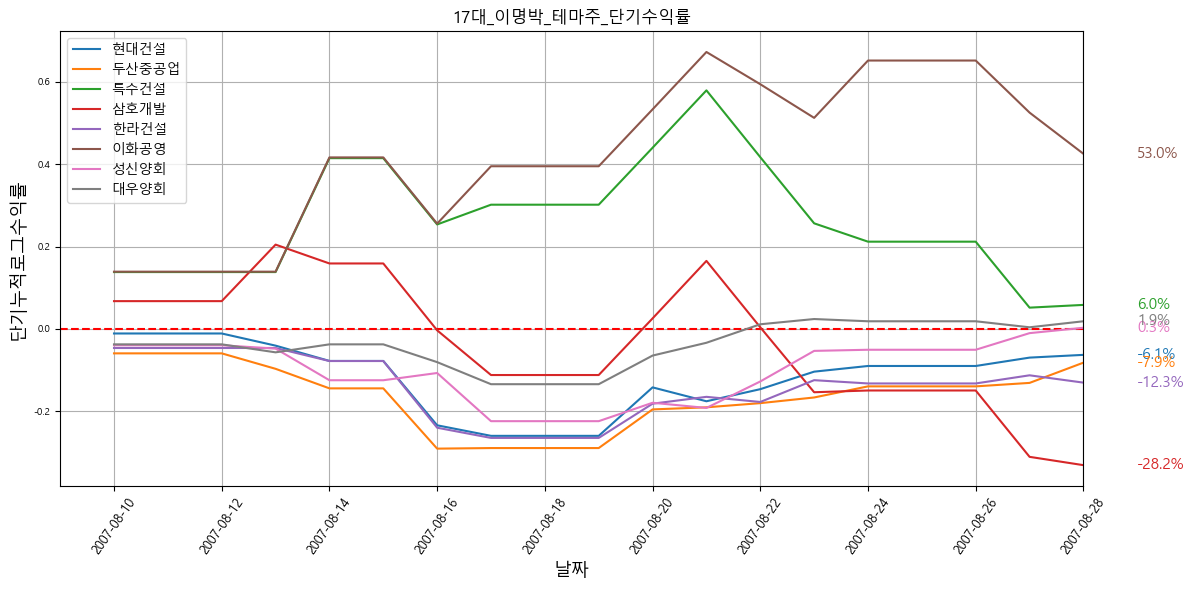

In [7]:
# 단기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema3', 'thema4', 'thema5','thema6', 'thema7', 'thema8', 'thema9']
labels = ['현대건설','두산중공업','특수건설','삼호개발','한라건설','이화공영','성신양회','대우양회']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('단기누적로그수익률', fontsize=13)
plt.title('17대_이명박_테마주_단기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

label_dict = {
    'thema1': '현대건설',
    'thema3': '두산중공업',
    'thema4': '특수건설',
    'thema5': '삼호개발',
    'thema6': '한라건설',
    'thema7': '이화공영',
    'thema8': '성신양회',
    'thema9': '대우건설',
    
}


# 열 이름을 종목명으로 바꿔 저장
daily_log_returns_named = daily_log_returns.rename(columns=label_dict)

# 누적 로그 수익률 → 일반 수익률로 변환
daily_normal_returns = np.exp(daily_log_returns_named) - 1

# 퍼센트 단위로 변환
daily_normal_returns_percent = daily_normal_returns * 100

# 저장
daily_normal_returns_percent.to_csv('17대_이명박_테마주_단기수익률.csv', encoding='utf-8-sig')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


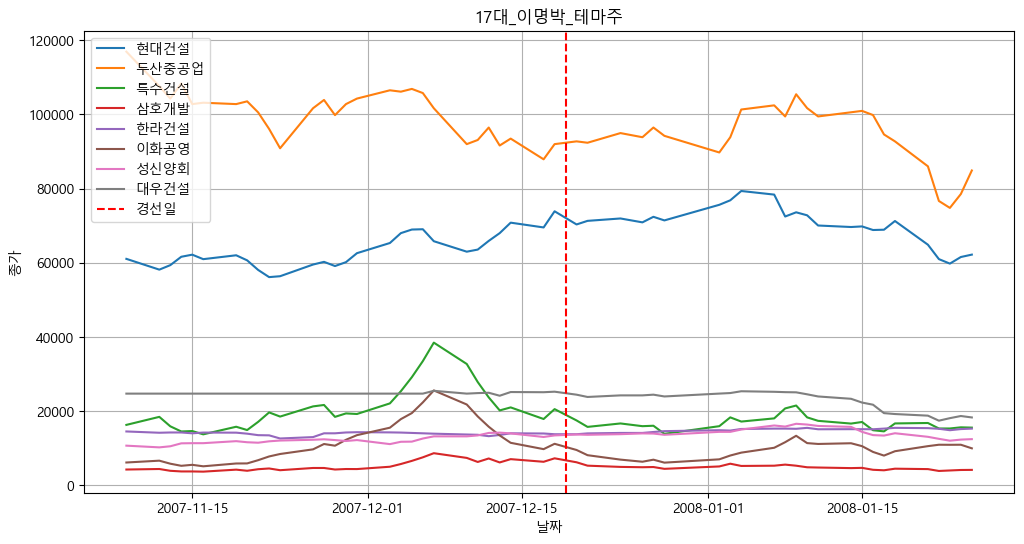

In [9]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2007-11-09' #경선확정일 - 40
end_date = '2008-01-28' #경선확정일 + 40

thema1 = yf.download('000720.KS', start=start_date, end=end_date) #테마주1
thema3 = yf.download('034020.KS', start=start_date, end=end_date)
thema4 = yf.download('026150.KS', start=start_date, end=end_date)
thema5 = yf.download('010960.KS', start=start_date, end=end_date)
thema6 = yf.download('014790.KS', start=start_date, end=end_date)
thema7 = yf.download('001840.KS', start=start_date, end=end_date)
thema8 = yf.download('004980.KS', start=start_date, end=end_date)
thema9 = yf.download('047040.KS', start=start_date, end=end_date)#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='현대건설')
plt.plot(thema.index, thema['thema3'], label='두산중공업')
plt.plot(thema.index, thema['thema4'], label='특수건설')
plt.plot(thema.index, thema['thema5'], label='삼호개발')
plt.plot(thema.index, thema['thema6'], label='한라건설')
plt.plot(thema.index, thema['thema7'], label='이화공영')
plt.plot(thema.index, thema['thema8'], label='성신양회')
plt.plot(thema.index, thema['thema9'], label='대우건설')
#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2007-12-19'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('17대_이명박_테마주')
plt.legend()
plt.grid(True)
plt.show()

label_dict = {
    'thema1': '현대건설',
    'thema3': '두산중공업',
    'thema4': '특수건설',
    'thema5': '삼호개발',
    'thema6': '한라건설',
    'thema7': '이화공영',
    'thema8': '성신양회',
    'thema9': '대우건설',
    
}

# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('17대_이명박_테마주_일별종가_장기.csv', encoding='utf-8-sig')


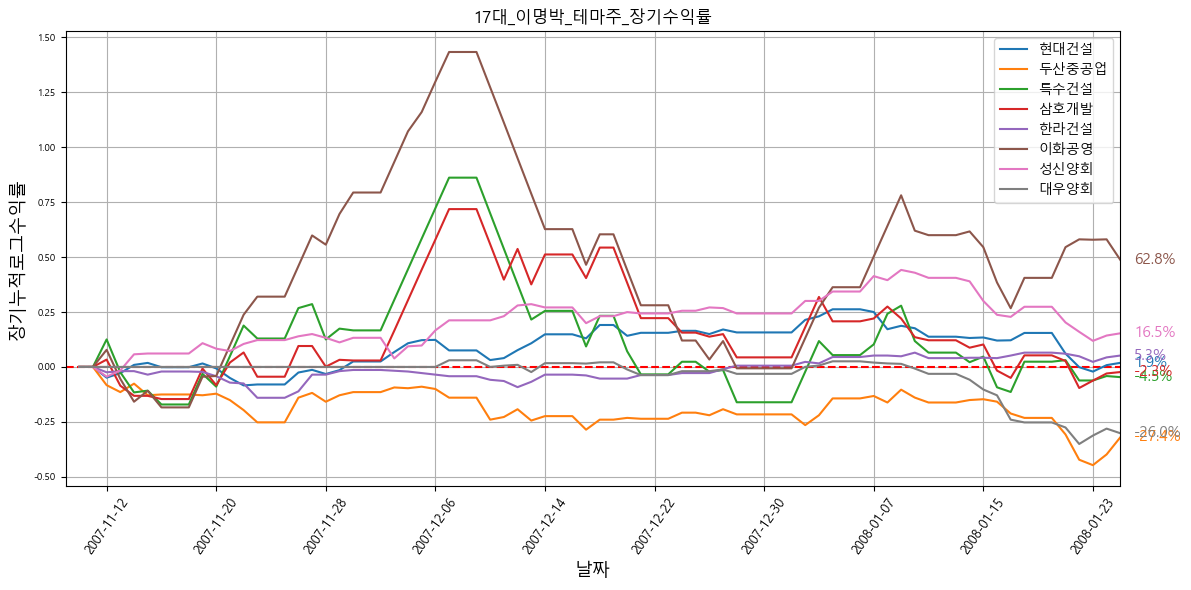

In [10]:
# 장기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema3', 'thema4', 'thema5','thema6', 'thema7', 'thema8', 'thema9']
labels = ['현대건설','두산중공업','특수건설','삼호개발','한라건설','이화공영','성신양회','대우양회']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=8)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('장기누적로그수익률', fontsize=13)
plt.title('17대_이명박_테마주_장기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

label_dict = {
    'thema1': '현대건설',
    'thema3': '두산중공업',
    'thema4': '특수건설',
    'thema5': '삼호개발',
    'thema6': '한라건설',
    'thema7': '이화공영',
    'thema8': '성신양회',
    'thema9': '대우건설',
    
}


# 열 이름을 종목명으로 바꿔 저장
daily_log_returns_named = daily_log_returns.rename(columns=label_dict)

# 누적 로그 수익률 → 일반 수익률로 변환
daily_normal_returns = np.exp(daily_log_returns_named) - 1

# 퍼센트 단위로 변환
daily_normal_returns_percent = daily_normal_returns * 100

# 저장
daily_normal_returns_percent.to_csv('17대_이명박_테마주_장기수익률.csv', encoding='utf-8-sig')